This notebook is the correction of the first exercise sheet.

In [3]:
# import all relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exercise 5

## Estimating the Bound of a Uniform Distribution

Consider estimating the upper bound $a > 0$ of the uniform distribution $U([0,a])$ with density:

$$f_a(x) = \begin{cases} \frac{1}{a} & \text{if } 0 \leq x \leq a \\ 0 & \text{otherwise} \end{cases}$$

from independent samples $X_1, \ldots, X_n \geq 0$.

### (a) Maximum Likelihood Estimator

What is the maximum likelihood estimator $\hat{a}_{\text{MLE}}$ of $a$?



The maximum likelihood estimator $\hat{a}_{\text{MLE}}$ of $a$ is:

$$\hat{a}_{\text{MLE}} = \max_{i=1,\ldots,n} X_i$$


For a sample $X_1, \ldots, X_n$ from $U([0,a])$, the likelihood function is:

$$L(a; X_1, \ldots, X_n) = \prod_{i=1}^{n} f_a(X_i) = \begin{cases} \frac{1}{a^n} & \text{if } 0 \leq X_i \leq a \text{ for all } i \\ 0 & \text{otherwise} \end{cases}$$

For the likelihood to be non-zero, we require $a \geq \max_i X_i$. Given this constraint, the likelihood $L(a) = \frac{1}{a^n} \mathbf{1}_{a \geq \max_i X_i}$ is a decreasing function of $a$.

Therefore, $L(a)$ is maximized when $a$ is as small as possible while still satisfying $a \geq \max_i X_i$.

This gives us:

$$\hat{a}_{\text{MLE}} = \max_{i=1,\ldots,n} X_i = X_{(n)}$$

where $X_{(n)}$ denotes the maximum order statistic.


### (b) MLE with Simulation

Similarly to problem 4, for a fixed value of $a$ (say, $a = 5$), write code to generate $n$ i.i.d. samples from $U([0,a])$ and compute $\hat{a}_{\text{MLE}}$.

For various values of $n$, plot a histogram of $\frac{\hat{a}_{\text{MLE}} - a}{\sqrt{n}}$ over 400 trials. Include in your submission a histogram for $n = 100$.

**Question:** Does the normalized error appear normally distributed for large $n$? Discuss this in light of what we know about asymptotic normality of the MLE.

**Note:** The sample mean $\bar{X}$ is not a good estimator of $a$. Since $X \sim U([0,a])$, we have $E[X] = \frac{a}{2}$. However, this suggests that an unbiased estimator is $\hat{a}_2 = 2\bar{X}$.


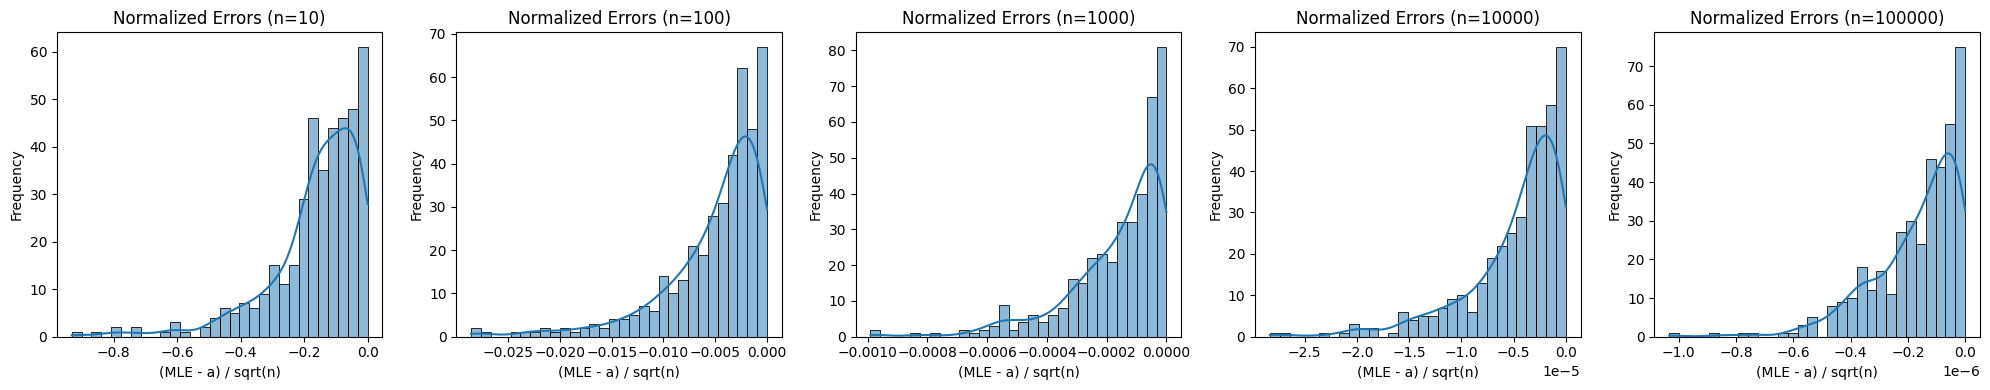

In [21]:
a = 5

def compute_mle_a(nb_samples, a=a):
    samples = np.random.uniform(0, a, nb_samples)
    mle_a = np.max(samples)
    return mle_a

def run_mle_trials(nb_trials, nb_samples, a=a):
    normalized_errors = np.zeros(nb_trials)
    for i in range(nb_trials):
        mle_a = compute_mle_a(nb_samples, a)
        normalized_errors[i] = (mle_a - a) / np.sqrt(nb_samples)
    return normalized_errors

nb_trials = 400
nb_samples_list = [10, 100, 1000, 10000, 100000]

fig, axs = plt.subplots(1, len(nb_samples_list), figsize=(20, 4))
for i, nb_samples in enumerate(nb_samples_list):
    normalized_errors = run_mle_trials(nb_trials, nb_samples, a)
    sns.histplot(normalized_errors, bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Normalized Errors (n={nb_samples})')
    axs[i].set_xlabel('(MLE - a) / sqrt(n)')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### (c) Unbiased Estimator Analysis

Repeat part (b) for the estimator $\hat{a}_2 = 2\bar{X}$ (this is not an MLE, but the central limit theorem still applies).


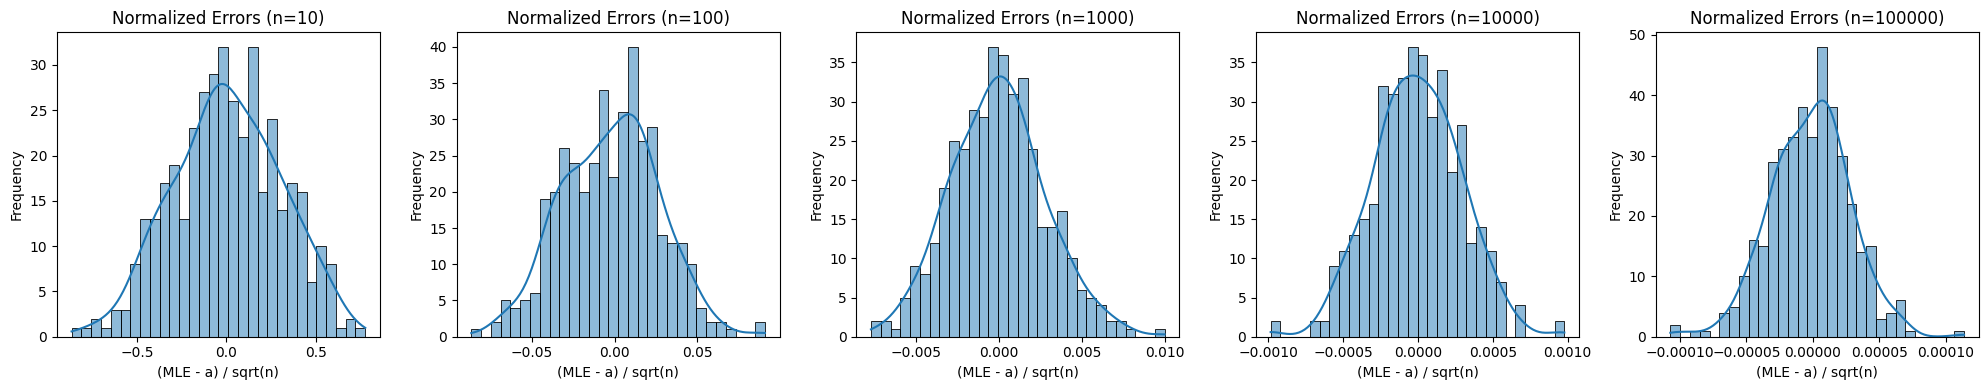

In [16]:
a = 5

def compute_moments_a(nb_samples, a=a):
    samples = np.random.uniform(0, a, nb_samples)
    moments = (2 / nb_samples) * np.sum(samples)
    return moments

def run_moments_trials(nb_trials, nb_samples, a=a):
    normalized_errors = np.zeros(nb_trials)
    for i in range(nb_trials):
        moments_a = compute_moments_a(nb_samples, a)
        normalized_errors[i] = (moments_a - a) / np.sqrt(nb_samples)
    return normalized_errors

nb_trials = 400
nb_samples_list = [10, 100, 1000, 10000, 100000]

fig, axs = plt.subplots(1, len(nb_samples_list), figsize=(20, 4))
for i, nb_samples in enumerate(nb_samples_list):
    normalized_errors = run_moments_trials(nb_trials, nb_samples, a)
    sns.histplot(normalized_errors, bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Normalized Errors (n={nb_samples})')
    axs[i].set_xlabel('(MLE - a) / sqrt(n)')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### (d) Comparison of Estimators

Which estimator ($\hat{a}_{\text{MLE}}$ or $\hat{a}_2$) appears to have less error? You can judge this qualitatively from the histograms, but you can also calculate it quantitatively: for each estimator (with 400 independent trials with $n = 100$), compute the empirical mean squared error:

$$\widehat{\text{MSE}} = \frac{1}{400} \sum_{k=1}^{400} \left(\hat{a}^{(k)} - a\right)^2$$

where $\hat{a}^{(k)}$ is the estimator from the $k$-th trial.

In [15]:
# we compare the two estimators by computing the MSE for n=100 and nb_trials=400
nb_trials = 400
nb_samples = 100
mle_errors = run_mle_trials(nb_trials, nb_samples, a) * np.sqrt(nb_samples)
moments_errors = run_moments_trials(nb_trials, nb_samples, a) * np.sqrt(nb_samples)
mle_mse = np.mean(np.array(mle_errors) ** 2)
moments_mse = np.mean(np.array(moments_errors) ** 2)

print(f'MLE MSE: {mle_mse:.4f}')
print(f'Moments MSE: {moments_mse:.4f}')

MLE MSE: 0.0053
Moments MSE: 0.0861
